In [1]:
import os
import numpy as np
import random
import copy
import pickle as pkl
import pandas as pd
import seaborn as sns
import random as rn 
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def results_vec_lr(attack, attack_list, filename2):
    
    sigma_factor = 2.0 #3-sigma=99.7% confidence, 2-sigma=95% confidence
    [df_results_original] = pkl.load(open(filename2,"rb") )

    strength_vec = np.unique(np.array(df_results_original['Perturbation_Strength']))

    x3_vec = []
    y3_vec_mean = []
    y3_vec_std = []
    for strength in strength_vec:
        df_0 = df_results_original[df_results_original['Perturbation_Strength']==strength]
        df_0 = df_0[df_0['Attack']==attack]

        x3_vec.append(strength)
        y3_vec_mean.append(np.mean(np.array(df_0['ACC'])))
        y3_vec_std.append(np.std(np.array(df_0['ACC'])))     

    y3_vec_upper = np.array(y3_vec_mean) + sigma_factor * np.array(y3_vec_std)
    y3_vec_lower = np.array(y3_vec_mean) - sigma_factor * np.array(y3_vec_std)
    y3_vec_mean = np.array(y3_vec_mean)    

    return [x3_vec, y3_vec_upper, y3_vec_lower, y3_vec_mean]
   
    
def results_vec(attack, attack_list, filename2):
    
    sigma_factor = 2.0 #3-sigma=99.7% confidence, 2-sigma=95% confidence
    df_results_original = pd.DataFrame()
    
    counter=0
    for fold in range(0,10):
        for attack_2 in attack_list:

            filename = filename2+attack_2+"_"+str(fold)+".pkl"    
            if os.path.isfile(filename): 
                #print('OK:'+filename)
                [df_results_original_tmp] = pkl.load(open(filename,"rb") )
                if counter>0:
                    df_results_original=df_results_original.append(df_results_original_tmp)
                else:
                    df_results_original=df_results_original_tmp
                counter = counter +1
    
    if counter > 0:
        
        strength_vec = np.unique(np.array(df_results_original['Perturbation_Strength']))
        x3_vec = []
        y3_vec_mean = []
        y3_vec_std = []
        for strength in strength_vec:
            df_0 = df_results_original[df_results_original['Perturbation_Strength']==strength]
            df_0 = df_0[df_0['Perturbation']==attack]
            x3_vec.append(strength)
            y3_vec_mean.append(np.mean(np.array(df_0['ACC'])))
            y3_vec_std.append(np.std(np.array(df_0['ACC'])))     

        y3_vec_upper = np.array(y3_vec_mean) + sigma_factor * np.array(y3_vec_std)
        y3_vec_lower = np.array(y3_vec_mean) - sigma_factor * np.array(y3_vec_std)
        y3_vec_mean = np.array(y3_vec_mean)    

        return [x3_vec, y3_vec_upper, y3_vec_lower, y3_vec_mean]
    
    else:
        return [[], [],[],[]]

In [3]:
attack_lst = ["NeighborKeyboard", "HomoPhones", "SimilarSymbols", ]
dataset_lst = ["YelpPolarity","AgNews", "DbPedia"]

sample_lst = [[5, 5, 5, 5],[10, 10, 5, 10],[5,5,5,5]]
epoch_lst = [[5, 40, 20, 20], [20, 20, 20, 50], [10, 20, 20, 20]] #tr128, tr1024, cnn9, cnn49
transformer1024_epochs=[40, 50, 30, 20]
text_table_latex=""
df_latex_table=pd.DataFrame()
df_latex_table_early=pd.DataFrame()
colors = ['#4c72b0', '#C5C9C7', '#55a868', '#8172b3', '#937860']
font_size = 43
marker_size = 12
alpha_value = 0.3
alpha_value2 = 0.5
line_width=1.5
labels = ['0', '0.2', '0.4', '0.6', '0.8', '1']
figure_lst = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
my_dpi = 300

In [4]:
path = "plots/"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    
path2 = path+ "Fig3/"
try:
    os.mkdir(path2)
except OSError:
    print ("Creation of the directory %s failed" % path2)
else:
    print ("Successfully created the directory %s " % path2)
    
path3 = path2+ "eps/"
try:
    os.mkdir(path3)
except OSError:
    print ("Creation of the directory %s failed" % path3)
else:
    print ("Successfully created the directory %s " % path3)
    
path4 = path2+ "png/"
try:
    os.mkdir(path4)
except OSError:
    print ("Creation of the directory %s failed" % path4)
else:
    print ("Successfully created the directory %s " % path4)

Creation of the directory plots/ failed
Creation of the directory plots/Fig3/ failed
Creation of the directory plots/Fig3/eps/ failed
Creation of the directory plots/Fig3/png/ failed


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

YelpPolarity
NeighborKeyboard


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

HomoPhones


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

SimilarSymbols


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


AgNews
NeighborKeyboard


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

HomoPhones


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

SimilarSymbols


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

DbPedia
NeighborKeyboard


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

HomoPhones


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

SimilarSymbols


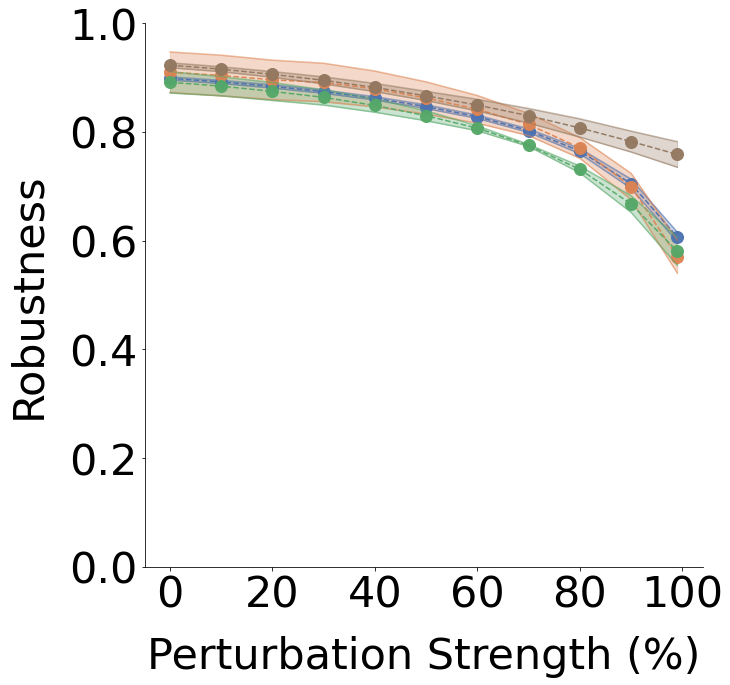

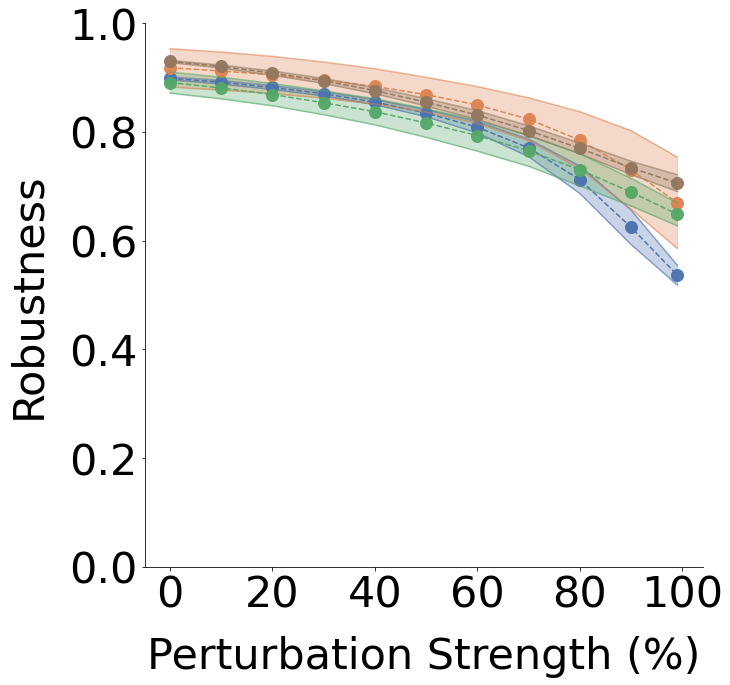

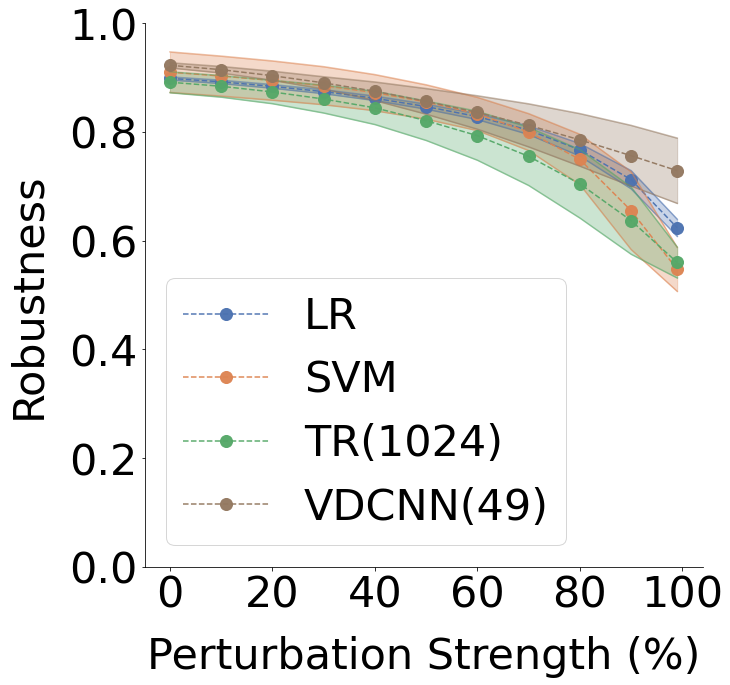

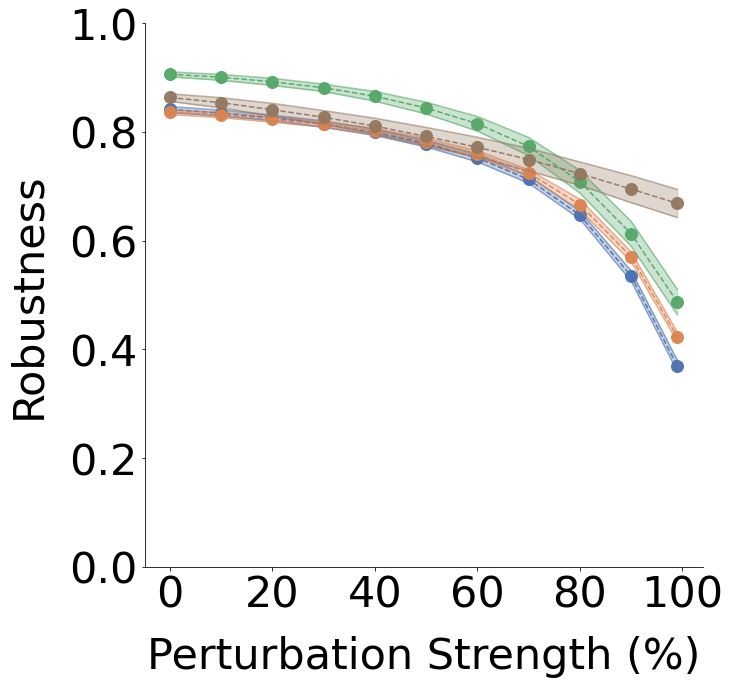

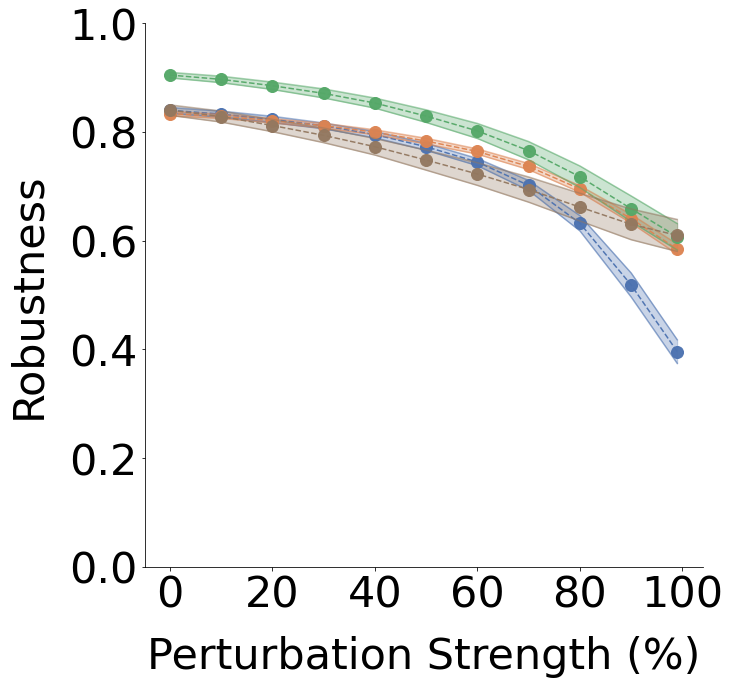

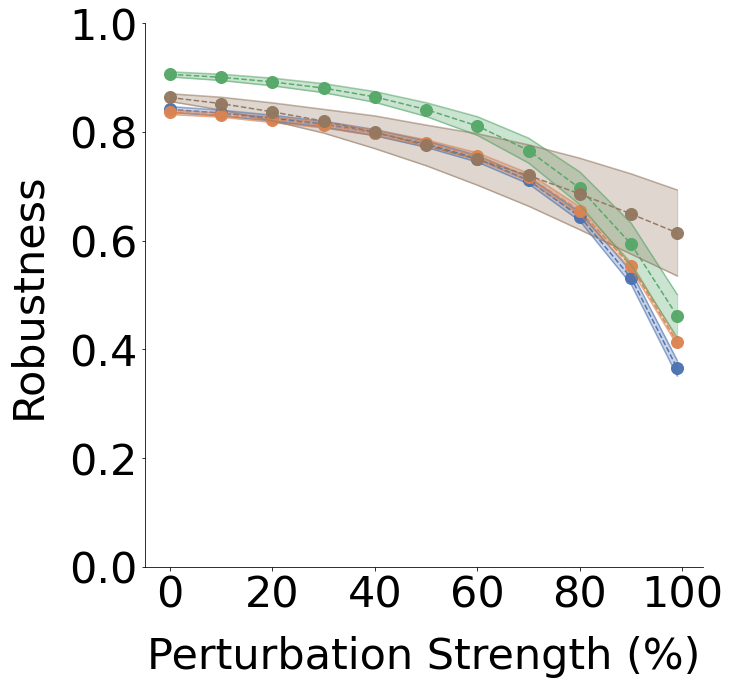

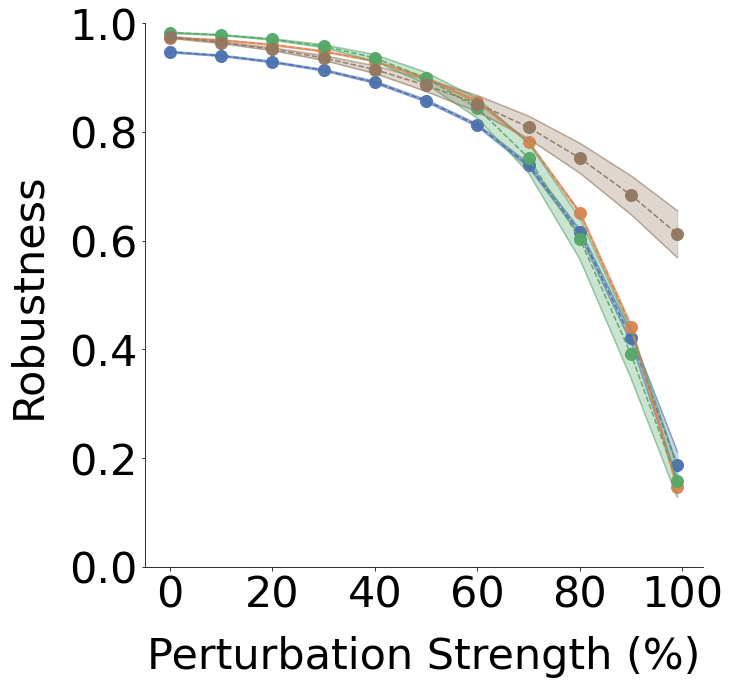

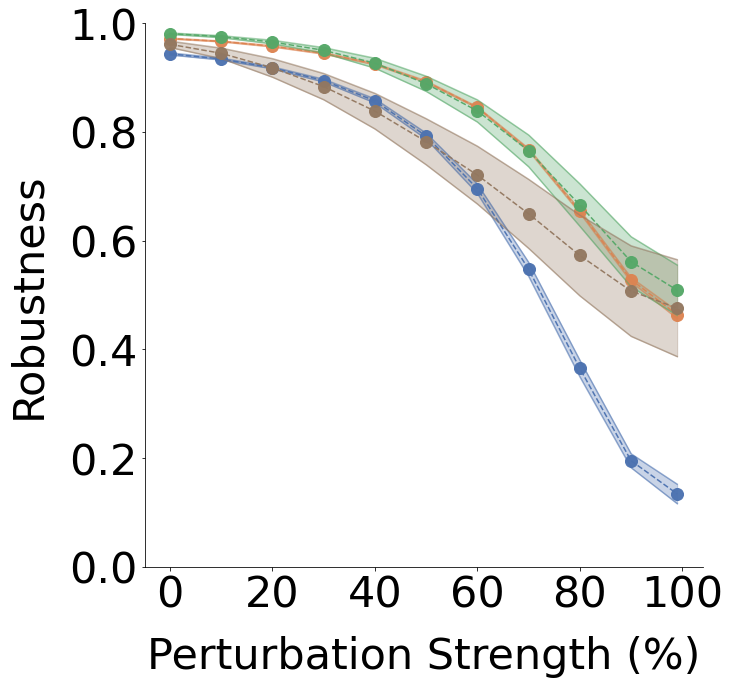

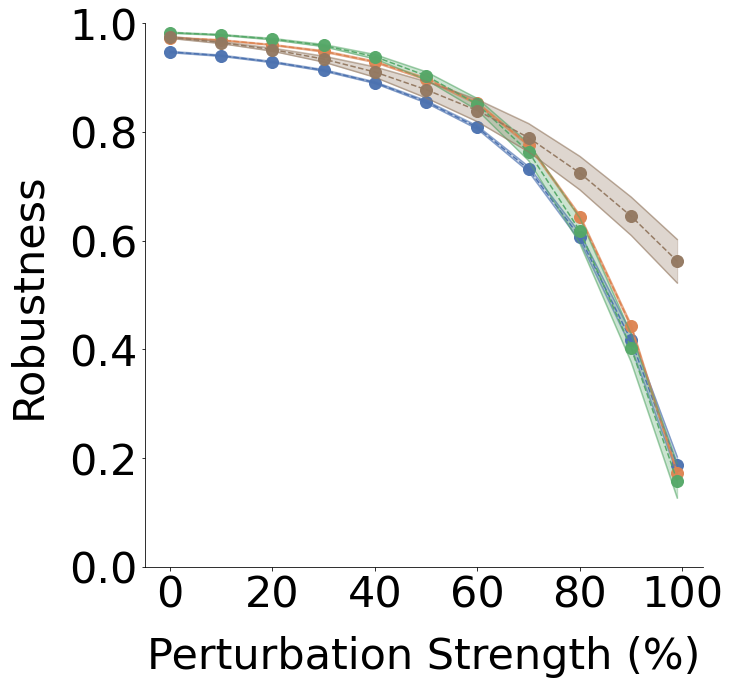

In [5]:
counter = 0

for dataset_idx in range(3):
    dataset = dataset_lst[dataset_idx]
    print(dataset)
    for attack_idx in range(len(attack_lst)):
        attack = attack_lst[attack_idx]
        print(attack)
        figure_no = figure_lst[counter]
        counter = counter + 1

        filename = "results_unperturbed/df_results_lr_"+dataset.lower()+".pkl"
        [lr_vec, lr_vec_upper, lr_vec_lower, lr_vec_mean] = results_vec_lr(attack, attack_lst, filename)

        filename = "results_unperturbed/results_unperturbed_svm_" + dataset + ".pkl"
        [svm_vec, svm_vec_upper, svm_vec_lower, svm_vec_mean] = results_vec_lr(attack, attack_lst, filename)

        filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][0])+"_Transformer(128)_epoch_"+str(epoch_lst[dataset_idx][0])+"_"+dataset+"_"
        [tr128_vec, tr128_vec_upper, tr128_vec_lower, tr128_vec_mean] = results_vec(attack, attack_lst, filename)

        filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][1])+"_Transformer(1024)_epoch_"+str(epoch_lst[dataset_idx][1])+"_"+dataset+"_"
        [tr1024_vec, tr1024_vec_upper, tr1024_vec_lower, tr1024_vec_mean] = results_vec(attack, attack_lst, filename)

        filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][3])+"_VDCNN(49)_epoch_"+str(epoch_lst[dataset_idx][3])+"_"+dataset+"_"
        [cnn49_vec, cnn49_vec_upper, cnn49_vec_lower, cnn49_vec_mean] = results_vec(attack, attack_lst, filename)

        vec=[]
        if len(lr_vec_mean)>0:
            vec.append("$"+str(np.round(lr_vec_mean[0]*100,2))+" \pm "+str(np.round(lr_vec_mean[0]*100-lr_vec_lower[0]*100,2))+"$")
        else:
            vec.append("$"+str("???")+" \pm "+str("???")+"$")
        if len(cnn49_vec_mean)>0:
            vec.append("$ "+str(np.round(cnn49_vec_mean[0]*100,2))+" \pm "+str(np.round(cnn49_vec_mean[0]*100-cnn49_vec_lower[0]*100,2))+"$")
        else:
            vec.append("$"+str("???")+" \pm "+str("???")+"$")
        if len(tr1024_vec_mean)>0:
            vec.append("$ "+str(np.round(tr1024_vec_mean[0]*100,2))+" \pm "+str(np.round(tr128_vec_mean[0]*100-tr1024_vec_lower[0]*100,2))+"$")
        else:
            vec.append("$ "+str("???")+" \pm "+str("???")+"$")

        df_latex_table['Model'] = ['\text{LR}','\text{CNN49}','\text{TR1024}']
        df_latex_table[dataset] = vec

        vec=[str("???"),str(epoch_lst[dataset_idx][2]),str(epoch_lst[dataset_idx][3]),str(epoch_lst[dataset_idx][0]),str(epoch_lst[dataset_idx][1])]
        df_latex_table_early['Model'] = ['\text{LR}','\text{CNN9}','\text{CNN49}','\text{TR128}','\text{TR1024}']
        df_latex_table_early[dataset] = vec

        plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
        plt.figure(figsize=(10,10))

        plt.fill_between(lr_vec, lr_vec_lower, lr_vec_upper, color='#4c72b0', alpha=alpha_value)
        plt.plot(lr_vec, lr_vec_mean, color = '#4c72b0', marker = 'o', linestyle = '--', ms=marker_size , label='LR', alpha=10)
        plt.plot(lr_vec, lr_vec_lower, color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
        plt.plot(lr_vec, lr_vec_upper,color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

        plt.fill_between(svm_vec, svm_vec_lower, svm_vec_upper, color='#dd8452', alpha=alpha_value)
        plt.plot(svm_vec, svm_vec_mean, color = '#dd8452', marker = 'o', linestyle = '--', ms=marker_size , label='SVM', alpha=10)
        plt.plot(svm_vec, svm_vec_lower, color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
        plt.plot(svm_vec, svm_vec_upper,color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

        plt.fill_between(tr1024_vec, tr1024_vec_lower, tr1024_vec_upper, color='#55a868', alpha=alpha_value)
        plt.plot(tr1024_vec, tr1024_vec_mean,color = '#55a868', marker = 'o', linestyle = '--', ms=marker_size , label='TR(1024)', alpha=10)
        plt.plot(tr1024_vec, tr1024_vec_lower,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
        plt.plot(tr1024_vec, tr1024_vec_upper,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

        plt.fill_between(cnn49_vec, cnn49_vec_lower, cnn49_vec_upper, color='#937860', alpha=alpha_value)
        plt.plot(cnn49_vec, cnn49_vec_mean,color = '#937860', marker = 'o', linestyle = '--', ms=marker_size , label='VDCNN(49)', alpha=10)
        plt.plot(cnn49_vec, cnn49_vec_lower,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
        plt.plot(cnn49_vec, cnn49_vec_upper,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

        plt.ylim([0.0, 1])
        plt.xlabel('Perturbation Strength (%)', fontsize=font_size, labelpad = 20)
        plt.ylabel('Robustness', fontsize=font_size, labelpad = 20)
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size)

        if dataset_idx == 0:
            if attack_idx == 2:
                plt.legend(fontsize=font_size)
        filename = path3 + figure_no + "_" + "unperturbed_"+dataset+"_"+attack+"_robustness_analysis.eps"
        plt.savefig(filename, format='eps', bbox_inches="tight")
        filename = path4 + figure_no + "_" + "unperturbed_"+dataset+"_"+attack+"_robustness_analysis.png"
        plt.savefig(filename, dpi = my_dpi, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

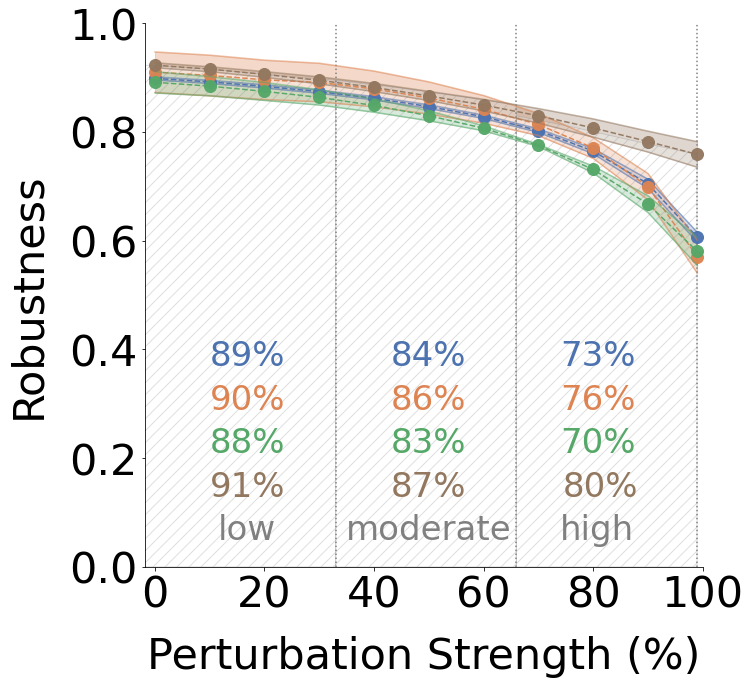

In [6]:
attack_lst = ["NeighborKeyboard", "HomoPhones", "SimilarSymbols", ]
dataset_lst = ["YelpPolarity","AgNews", "DbPedia"]
sample_lst = [[5, 5, 5, 5],[10, 10, 5, 10],[5,5,5,5]]
epoch_lst = [[5, 40, 20, 20], [20, 20, 20, 50], [10, 20, 20, 20]]

colors = ['#4c72b0', '#dd8452', '#55a868', '#8172b3', '#937860']
font_size = 43
marker_size = 12
alpha_value = 0.3
alpha_value2 = 0.5
line_width=1.5

dataset_idx = 0
dataset = "YelpPolarity"
attack = "NeighborKeyboard"
attack_idx = 0
filename = "results_unperturbed/df_results_lr_"+dataset.lower()+".pkl"
[lr_vec, lr_vec_upper, lr_vec_lower, lr_vec_mean] = results_vec_lr(attack, attack_lst, filename)

filename = "results_unperturbed/results_unperturbed_svm_" + dataset + ".pkl"
[svm_vec, svm_vec_upper, svm_vec_lower, svm_vec_mean] = results_vec_lr(attack, attack_lst, filename)

epoch = epoch_lst[dataset_idx][1]
filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][1])+"_Transformer(1024)_epoch_"+str(epoch)+"_"+dataset+"_"
[tr1024_vec, tr1024_vec_upper, tr1024_vec_lower, tr1024_vec_mean] = results_vec(attack, attack_lst, filename)

filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][3])+"_VDCNN(49)_epoch_"+str(epoch_lst[dataset_idx][3])+"_"+dataset+"_"
[cnn49_vec, cnn49_vec_upper, cnn49_vec_lower, cnn49_vec_mean] = results_vec(attack, attack_lst, filename)

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.figure(figsize=(10,10))

plt.fill_between(lr_vec, lr_vec_lower, lr_vec_upper, color='#4c72b0', alpha=alpha_value)
plt.plot(lr_vec, lr_vec_mean, color = '#4c72b0', marker = 'o', linestyle = '--', ms=marker_size , label='LR', alpha=10)
plt.plot(lr_vec, lr_vec_lower, color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(lr_vec, lr_vec_upper,color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(svm_vec, svm_vec_lower, svm_vec_upper, color='#dd8452', alpha=alpha_value)
plt.plot(svm_vec, svm_vec_mean, color = '#dd8452', marker = 'o', linestyle = '--', ms=marker_size , label='SVM', alpha=10)
plt.plot(svm_vec, svm_vec_lower, color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(svm_vec, svm_vec_upper,color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(tr1024_vec, tr1024_vec_lower, tr1024_vec_upper, color='#55a868', alpha=alpha_value)
plt.plot(tr1024_vec, tr1024_vec_mean,color = '#55a868', marker = 'o', linestyle = '--', ms=marker_size , label='TR(1024)', alpha=10)
plt.plot(tr1024_vec, tr1024_vec_lower,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(tr1024_vec, tr1024_vec_upper,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(cnn49_vec, cnn49_vec_lower, cnn49_vec_upper, color='#937860', alpha=alpha_value)
plt.plot(cnn49_vec, cnn49_vec_mean,color = '#937860', marker = 'o', linestyle = '--', ms=marker_size , label='VDCNN(49)', alpha=10)
plt.plot(cnn49_vec, cnn49_vec_lower,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(cnn49_vec, cnn49_vec_upper,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.vlines(33, 0, 1, colors = "grey", linestyles = "dotted") #{'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines(66, 0, 1, colors = "grey", linestyles = "dotted")
plt.vlines(99, 0, 1, colors = "grey", linestyles = "dotted")

size = 34
plt.text(11.5, 0.05, "low", color= "grey", fontsize = size)
plt.text(34.8, 0.05, "moderate", color= "grey", fontsize = size)
plt.text(74, 0.05, "high", color= "grey", fontsize = size)

plt.text(10, 0.37, "89%", color= "#4c72b0", fontsize = size)
plt.text(10, 0.29, "90%", color= "#dd8452", fontsize = size)
plt.text(10, 0.21, "88%", color= "#55a868", fontsize = size)
plt.text(10, 0.13, "91%", color= "#937860", fontsize = size)

plt.text(43, 0.37, "84%", color= "#4c72b0", fontsize = size)
plt.text(43, 0.29, "86%", color= "#dd8452", fontsize = size)
plt.text(43, 0.21, "83%", color= "#55a868", fontsize = size)
plt.text(43, 0.13, "87%", color= "#937860", fontsize = size)

plt.text(74, 0.37, "73%", color= "#4c72b0", fontsize = size)
plt.text(74, 0.29, "76%", color= "#dd8452", fontsize = size)
plt.text(74, 0.21, "70%", color= "#55a868", fontsize = size)
plt.text(74.5, 0.13, "80%", color= "#937860", fontsize = size)

plt.fill_between([-1.9,10,20,33], cnn49_vec_mean[0:4], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.fill_between([33,44,55,66], cnn49_vec_mean[3:7], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.fill_between([66,77,88,99], cnn49_vec_mean[7:], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.ylim([0,1])
plt.xlim([-1.9,100])
plt.xlabel('Perturbation Strength (%)', fontsize=font_size, labelpad = 20)
plt.ylabel('Robustness', fontsize=font_size, labelpad = 20)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
filename = path3 + "a_unperturbed_"+dataset+"_"+attack+"_robustness_analysis.eps"
plt.savefig(filename, format = "eps", bbox_inches="tight")
filename = path4 + "a_unperturbed_"+dataset+"_"+attack+"_robustness_analysis.png"
plt.savefig(filename, dpi = my_dpi, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

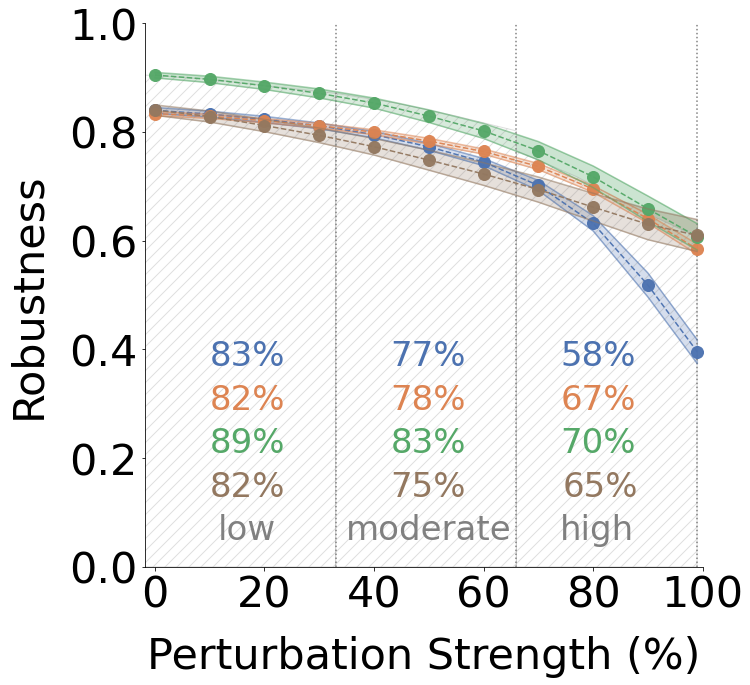

In [7]:
dataset_idx = 1
dataset = "AgNews"
attack = "HomoPhones"
attack_idx = 1

filename = "results_unperturbed/df_results_lr_"+dataset.lower()+".pkl"
[lr_vec, lr_vec_upper, lr_vec_lower, lr_vec_mean] = results_vec_lr(attack, attack_lst, filename)

filename = "results_unperturbed/results_unperturbed_svm_" + dataset + ".pkl"
[svm_vec, svm_vec_upper, svm_vec_lower, svm_vec_mean] = results_vec_lr(attack, attack_lst, filename)

epoch = epoch_lst[dataset_idx][1]
filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][1])+"_Transformer(1024)_epoch_"+str(epoch)+"_"+dataset+"_"
[tr1024_vec, tr1024_vec_upper, tr1024_vec_lower, tr1024_vec_mean] = results_vec(attack, attack_lst, filename)

filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][3])+"_VDCNN(49)_epoch_"+str(epoch_lst[dataset_idx][3])+"_"+dataset+"_"
[cnn49_vec, cnn49_vec_upper, cnn49_vec_lower, cnn49_vec_mean] = results_vec(attack, attack_lst, filename)

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.figure(figsize=(10,10))

plt.fill_between(lr_vec, lr_vec_lower, lr_vec_upper, color='#4c72b0', alpha=alpha_value)
plt.plot(lr_vec, lr_vec_mean, color = '#4c72b0', marker = 'o', linestyle = '--', ms=marker_size , label='LR', alpha=10)
plt.plot(lr_vec, lr_vec_lower, color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(lr_vec, lr_vec_upper,color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(svm_vec, svm_vec_lower, svm_vec_upper, color='#dd8452', alpha=alpha_value)
plt.plot(svm_vec, svm_vec_mean, color = '#dd8452', marker = 'o', linestyle = '--', ms=marker_size , label='SVM', alpha=10)
plt.plot(svm_vec, svm_vec_lower, color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(svm_vec, svm_vec_upper,color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(tr1024_vec, tr1024_vec_lower, tr1024_vec_upper, color='#55a868', alpha=alpha_value)
plt.plot(tr1024_vec, tr1024_vec_mean,color = '#55a868', marker = 'o', linestyle = '--', ms=marker_size , label='TR(1024)', alpha=10)
plt.plot(tr1024_vec, tr1024_vec_lower,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(tr1024_vec, tr1024_vec_upper,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(cnn49_vec, cnn49_vec_lower, cnn49_vec_upper, color='#937860', alpha=alpha_value)
plt.plot(cnn49_vec, cnn49_vec_mean,color = '#937860', marker = 'o', linestyle = '--', ms=marker_size , label='VDCNN(49)', alpha=10)
plt.plot(cnn49_vec, cnn49_vec_lower,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(cnn49_vec, cnn49_vec_upper,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.vlines(33, 0, 1, colors = "grey", linestyles = "dotted") #{'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines(66, 0, 1, colors = "grey", linestyles = "dotted")
plt.vlines(99, 0, 1, colors = "grey", linestyles = "dotted")

plt.text(11.5, 0.05, "low", color= "grey", fontsize = size)
plt.text(34.8, 0.05, "moderate", color= "grey", fontsize = size)
plt.text(74, 0.05, "high", color= "grey", fontsize = size)

plt.text(10, 0.37, "83%", color= "#4c72b0", fontsize = size)
plt.text(10, 0.29, "82%", color= "#dd8452", fontsize = size)
plt.text(10, 0.21, "89%", color= "#55a868", fontsize = size)
plt.text(10, 0.13, "82%", color= "#937860", fontsize = size)

plt.text(43, 0.37, "77%", color= "#4c72b0", fontsize = size)
plt.text(43, 0.29, "78%", color= "#dd8452", fontsize = size)
plt.text(43, 0.21, "83%", color= "#55a868", fontsize = size)
plt.text(43, 0.13, "75%", color= "#937860", fontsize = size)

plt.text(74, 0.37, "58%", color= "#4c72b0", fontsize = size)
plt.text(74, 0.29, "67%", color= "#dd8452", fontsize = size)
plt.text(74, 0.21, "70%", color= "#55a868", fontsize = size)
plt.text(74.5, 0.13, "65%", color= "#937860", fontsize = size)

plt.fill_between([-1.9,10,20,33], tr1024_vec_mean[0:4], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.fill_between([33,44,55,66], tr1024_vec_mean[3:7], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.fill_between([66,77,88,99], tr1024_vec_mean[7:], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.ylim([0,1])
plt.xlim([-1.9,100])
plt.xlabel('Perturbation Strength (%)', fontsize=font_size, labelpad = 20)
plt.ylabel('Robustness', fontsize=font_size, labelpad = 20)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
filename = path3 + "e_unperturbed_"+dataset+"_"+attack+"_robustness_analysis.eps"
plt.savefig(filename, format = "eps", bbox_inches="tight")
filename = path4 + "e_unperturbed_"+dataset+"_"+attack+"_robustness_analysis.png"
plt.savefig(filename, dpi = my_dpi, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

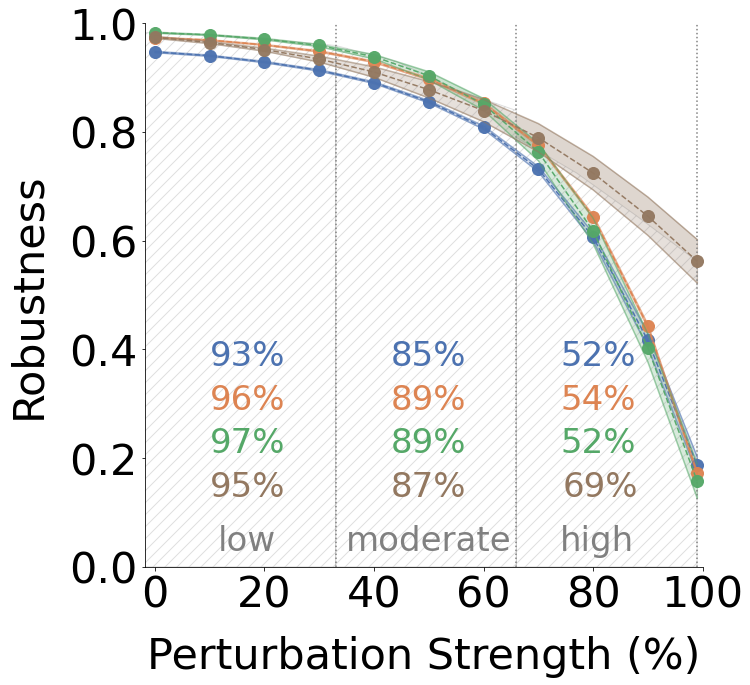

In [8]:
dataset_idx = 2 #dbpedia
attack = "SimilarSymbols"
dataset = "DbPedia"
attack_idx = 2

filename = "results_unperturbed/df_results_lr_"+dataset.lower()+".pkl"
[lr_vec, lr_vec_upper, lr_vec_lower, lr_vec_mean] = results_vec_lr(attack, attack_lst, filename)

filename = "results_unperturbed/results_unperturbed_svm_" + dataset + ".pkl"
[svm_vec, svm_vec_upper, svm_vec_lower, svm_vec_mean] = results_vec_lr(attack, attack_lst, filename)

filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][0])+"_Transformer(128)_epoch_"+str(epoch_lst[dataset_idx][0])+"_"+dataset+"_"
[tr128_vec, tr128_vec_upper, tr128_vec_lower, tr128_vec_mean] = results_vec(attack, attack_lst, filename)

epoch = epoch_lst[dataset_idx][1]
filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][1])+"_Transformer(1024)_epoch_"+str(epoch)+"_"+dataset+"_"
[tr1024_vec, tr1024_vec_upper, tr1024_vec_lower, tr1024_vec_mean] = results_vec(attack, attack_lst, filename)

filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][2])+"_VDCNN(9)_epoch_"+str(epoch_lst[dataset_idx][2])+"_"+dataset+"_"
[cnn9_vec, cnn9_vec_upper, cnn9_vec_lower, cnn9_vec_mean] = results_vec(attack, attack_lst, filename)

filename="results_unperturbed/perturbation_curve_samples_"+str(sample_lst[dataset_idx][3])+"_VDCNN(49)_epoch_"+str(epoch_lst[dataset_idx][3])+"_"+dataset+"_"
[cnn49_vec, cnn49_vec_upper, cnn49_vec_lower, cnn49_vec_mean] = results_vec(attack, attack_lst, filename)

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.figure(figsize=(10,10))

plt.fill_between(lr_vec, lr_vec_lower, lr_vec_upper, color='#4c72b0', alpha=alpha_value)
plt.plot(lr_vec, lr_vec_mean, color = '#4c72b0', marker = 'o', linestyle = '--', ms=marker_size , label='LR', alpha=10)
plt.plot(lr_vec, lr_vec_lower, color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(lr_vec, lr_vec_upper,color = '#4c72b0', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(svm_vec, svm_vec_lower, svm_vec_upper, color='#dd8452', alpha=alpha_value)
plt.plot(svm_vec, svm_vec_mean, color = '#dd8452', marker = 'o', linestyle = '--', ms=marker_size , label='SVM', alpha=10)
plt.plot(svm_vec, svm_vec_lower, color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(svm_vec, svm_vec_upper,color = '#dd8452', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(tr1024_vec, tr1024_vec_lower, tr1024_vec_upper, color='#55a868', alpha=alpha_value)
plt.plot(tr1024_vec, tr1024_vec_mean,color = '#55a868', marker = 'o', linestyle = '--', ms=marker_size , label='TR(1024)', alpha=10)
plt.plot(tr1024_vec, tr1024_vec_lower,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(tr1024_vec, tr1024_vec_upper,color = '#55a868', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.fill_between(cnn49_vec, cnn49_vec_lower, cnn49_vec_upper, color='#937860', alpha=alpha_value)
plt.plot(cnn49_vec, cnn49_vec_mean,color = '#937860', marker = 'o', linestyle = '--', ms=marker_size , label='VDCNN(49)', alpha=10)
plt.plot(cnn49_vec, cnn49_vec_lower,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)
plt.plot(cnn49_vec, cnn49_vec_upper,color = '#937860', linestyle = '-', linewidth=line_width, ms=marker_size , alpha=alpha_value2)

plt.vlines(33, 0, 1, colors = "grey", linestyles = "dotted") #{'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines(66, 0, 1, colors = "grey", linestyles = "dotted")
plt.vlines(99, 0, 1, colors = "grey", linestyles = "dotted")

plt.text(11.5, 0.03, "low", color= "grey", fontsize = size)
plt.text(34.8, 0.03, "moderate", color= "grey", fontsize = size)
plt.text(74, 0.03, "high", color= "grey", fontsize = size)

plt.text(10, 0.37, "93%", color= "#4c72b0", fontsize = size)
plt.text(10, 0.29, "96%", color= "#dd8452", fontsize = size)
plt.text(10, 0.21, "97%", color= "#55a868", fontsize = size)
plt.text(10, 0.13, "95%", color= "#937860", fontsize = size)

plt.text(43, 0.37, "85%", color= "#4c72b0", fontsize = size)
plt.text(43, 0.29, "89%", color= "#dd8452", fontsize = size)
plt.text(43, 0.21, "89%", color= "#55a868", fontsize = size)
plt.text(43, 0.13, "87%", color= "#937860", fontsize = size)

plt.text(74, 0.37, "52%", color= "#4c72b0", fontsize = size)
plt.text(74, 0.29, "54%", color= "#dd8452", fontsize = size)
plt.text(74, 0.21, "52%", color= "#55a868", fontsize = size)
plt.text(74.5, 0.13, "69%", color= "#937860", fontsize = size)

plt.fill_between([-1.9,10,20,33], tr1024_vec_mean[0:4], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.fill_between([33,44,55,66], [0.95899206, 0.93, 0.87772857, 0.83929048], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.fill_between([66,77,88,99], cnn49_vec_mean[7:], color = "white", hatch = "//", edgecolor='grey', alpha = 0.25)
plt.ylim([0,1])
plt.xlim([-1.9,100])
plt.xlabel('Perturbation Strength (%)', fontsize=font_size, labelpad = 20)
plt.ylabel('Robustness', fontsize=font_size, labelpad = 20)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
filename = path3 + "i_unperturbed_"+dataset+"_"+attack+"_robustness_analysis.eps"
plt.savefig(filename, format = "eps", bbox_inches="tight")
filename = path4 + "i_unperturbed_"+dataset+"_"+attack+"_robustness_analysis.png"
plt.savefig(filename, dpi = my_dpi, bbox_inches="tight")